# Importing Libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
from category_encoders import OneHotEncoder,BinaryEncoder
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import re
import ast
import joblib
from catboost import CatBoostClassifier
from sklearn.metrics import ConfusionMatrixDisplay, roc_curve, auc
from sklearn.preprocessing import label_binarize
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import pointbiserialr
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
import time
from sklearn.feature_selection import f_classif
from scipy.stats import chi2_contingency
from sklearn.feature_selection import chi2
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import RobustScaler
import matplotlib.patches as mpatches
import math
import lightgbm as lgb
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SequentialFeatureSelector
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

In [2]:
def data_info(data):

    """
    This function returns a DataFrame containing the summary information for each column 
    """

    Names=[col for col in data]
    data_types=[data[col].dtype for col in data.columns]
    top_10_unique_values=[data[col].value_counts().head(10).index.to_list() for col in data.columns]
    nunique_values=[data[col].nunique() for col in data.columns]
    nulls=[data[col].isnull().sum() for col in data.columns]
    percent_of_Nulls= [data[col].isnull().sum()/len(data)*100 for col in data.columns]
    duplicates=data.duplicated().sum()


    info_df=pd.DataFrame({'Name':Names,
                          'Data_Type':data_types,
                          'Top_10_Unique_Values':top_10_unique_values,
                          'Nunique_Values':nunique_values,
                          'Nulls':nulls,
                          'Percent_of_Nulls':percent_of_Nulls,
                          'Duplicates':duplicates})
    return info_df

# Reading Data

In [3]:
df1=pd.read_csv(r"C:\Users\moham\Downloads\College\Machine_Learning\PROJECT\Classification\DataSet\info_base_games.csv")
df1.head()

,appid,name,metacritic,steam_achievements,steam_trading_cards,workshop_support,genres,achievements_total,release_date,supported_platforms
0,2574000,Femboy Burgers,NaN,True,True,True,"Casual, Indie",NaN,"Oct 9, 2023","['windows', 'mac', 'linux']"
1,2574120,PPA Pickleball Tour 2025,NaN,True,True,True,"Indie, Simulation, Sports",18,"Jul 16, 2024","['windows', 'mac', 'linux']"
2,2573200,Squeaky Squad,NaN,True,True,True,"Action, Adventure, Indie",27,"Mar 29, 2024","['windows', 'mac', 'linux']"
3,2573440,Paradox Metal,NaN,True,True,True,"Action, Early Access",NaN,Coming soon,"['windows', 'mac', 'linux']"
4,2569520,Naturpark Lillebælt VR,NaN,True,True,True,"Action, Adventure",NaN,"Sep 18, 2023","['windows', 'mac', 'linux']"


In [4]:
df1.shape

(99167, 10)

In [5]:
data_info(df1)

,Name,Data_Type,Top_10_Unique_Values,Nunique_Values,Nulls,Percent_of_Nulls,Duplicates
0,appid,object,"[1811260, 2574000, 1024400, 1023570, 1023560, ...",99166,0,0.000000,0
1,name,object,"[Echoes, Delirium, Dark Light, Creator-initial...",95004,18,0.018151,0
2,metacritic,object,"[80, 76, 75, 68, 73, 81, 79.0, 81.0, 80.0, 77]",170,96148,96.955640,0
3,steam_achievements,bool,"[False, True]",2,0,0.000000,0
4,steam_trading_cards,bool,"[False, True]",2,0,0.000000,0
5,workshop_support,bool,"[False, True]",2,0,0.000000,0
6,genres,object,"[Action, Adventure, Indie, Casual, Indie, Acti...",2699,4778,4.818135,0
7,achievements_total,object,"[10, 12, 6, 20, 15, 10.0, 5, 8, 11, 16]",695,61052,61.564835,0
8,release_date,object,"[Coming soon, To be announced, 2025, Q1 2025, ...",4788,306,0.308570,0
9,supported_platforms,object,"[['windows'], ['windows', 'mac', 'linux'], ['w...",7,0,0.000000,0


In [6]:
df2=pd.read_csv(r"C:\Users\moham\Downloads\College\Machine_Learning\PROJECT\Classification\DataSet\demos.csv")
df2.head()

,Unnamed: 0,full_game_appid,demo_appid,name
0,0,2214650,2573370,Rolando Deluxe Demo
1,1,1439980,2573460,Outrunner: Neon Nights Demo
2,2,2412240,2572840,Bubble Ghost Remake Demo
3,3,2448830,2572240,Time Handlers Demo
4,4,2379590,2570800,Hope's Final Defense Demo


In [7]:
df2.shape

(15449, 4)

In [8]:
data_info(df2)

,Name,Data_Type,Top_10_Unique_Values,Nunique_Values,Nulls,Percent_of_Nulls,Duplicates
0,Unnamed: 0,int64,"[0, 10264, 10296, 10297, 10298, 10299, 10300, ...",15449,0,0.000000,0
1,full_game_appid,object,"[2214650, 1646810, 1831020, 1832380, 1146420, ...",15449,0,0.000000,0
2,demo_appid,object,"[2573370, 1855960, 1846470, 1845950, 1845990, ...",15449,0,0.000000,0
3,name,object,"[Exodus Demo, #NAME?, Automatica Demo, Dungeon...",15425,1,0.006473,0


In [9]:
df3=pd.read_csv(r"C:\Users\moham\Downloads\College\Machine_Learning\PROJECT\Classification\DataSet\dlcs.csv")
df3.head()

,base_appid,dlc_appid,name
0,1786750,2568660,家出王女 - 全年齢版ストーリー&グラフィック追加 DLC
1,1981700,2563730,Jacob's Quest - Voyage
2,2009450,2552980,Invector: Rhythm Galaxy - Latin Power Song Pack
3,1133420,2550750,Hero or Villain: Genesis — Supercharged!
4,2533950,2551000,Hot And Lovely ：Uniform - adult patch


In [10]:
df3.shape

(5445, 3)

In [11]:
data_info(df3)

,Name,Data_Type,Top_10_Unique_Values,Nunique_Values,Nulls,Percent_of_Nulls,Duplicates
0,base_appid,object,"[1786750, 638850, 883390, 880550, 771500, 8131...",5445,0,0.0,0
1,dlc_appid,object,"[2568660, 890020, 888110, 887980, 888590, 8890...",5445,0,0.0,0
2,name,object,"[Dungeon Full Dive - True Supporter Dice, Doll...",5443,0,0.0,0


In [12]:
df4=pd.read_csv(r"C:\Users\moham\Downloads\College\Machine_Learning\PROJECT\Classification\DataSet\ms2_gamalytic_steam_games.csv")
df4.head()

,steamId,price,copiesSold,publisherClass,reviewScore,aiContent
0,730,0.0,Platinum,AAA,87,NaN
1,570,0.0,Platinum,AAA,82,NaN
2,578080,0.0,Platinum,AAA,59,NaN
3,440,0.0,Platinum,AAA,90,NaN
4,1172470,0.0,Platinum,AAA,67,NaN


In [13]:
df4.shape

(93338, 6)

In [14]:
data_info(df4)

,Name,Data_Type,Top_10_Unique_Values,Nunique_Values,Nulls,Percent_of_Nulls,Duplicates
0,steamId,int64,"[730, 848890, 3461160, 770850, 2304650, 109873...",93338,0,0.0,0
1,price,float64,"[0.0, 4.99, 9.99, 0.99, 1.99, 2.99, 3.99, 14.9...",350,0,0.0,0
2,copiesSold,object,"[Bronze, Silver, Gold, Platinum]",4,0,0.0,0
3,publisherClass,object,"[Hobbyist, Indie, AA, AAA]",4,0,0.0,0
4,reviewScore,int64,"[100, 0, 50, 67, 75, 83, 80, 88, 86, 89]",99,0,0.0,0
5,aiContent,float64,[],0,93338,100.0,0


# Convert Appid Data Type in all Data Frames

In [15]:
df1["appid"] = pd.to_numeric(df1['appid'], errors='coerce').astype('Int64')
df2["appid"] = pd.to_numeric(df2['full_game_appid'], errors='coerce').astype('Int64')
df3["appid"] = pd.to_numeric(df3['base_appid'], errors='coerce').astype('Int64')
df4["appid"] = pd.to_numeric(df4['steamId'], errors='coerce').astype('Int64')

# Merge All Data Frames

In [16]:
merged = pd.merge(df1,   df4, on='appid', how='inner')
merged = pd.merge(merged, df2,   on='appid', how='left')
df = pd.merge(merged, df3,  on='appid', how='left')

In [17]:
data_info(df)

,Name,Data_Type,Top_10_Unique_Values,Nunique_Values,Nulls,Percent_of_Nulls,Duplicates
0,appid,Int64,"[3297920, 3175890, 2317310, 2316930, 3332170, ...",67909,0,0.000000,0
1,name_x,object,"[Echoes, Delirium, Alone, Zombie Hunter, Lost,...",67531,0,0.000000,0
2,metacritic,object,"[80, 76, 73, 68, 75, 81, 79.0, 81.0, 80.0, 77]",169,66495,95.775480,0
3,steam_achievements,bool,"[True, False]",2,0,0.000000,0
4,steam_trading_cards,bool,"[False, True]",2,0,0.000000,0
5,workshop_support,bool,"[False, True]",2,0,0.000000,0
6,genres,object,"[Casual, Indie, Action, Indie, Action, Adventu...",2016,104,0.149795,0
7,achievements_total,object,"[10, 12, 6, 20, 15, 10.0, 8, 5, 11, 16]",691,32133,46.282480,0
8,release_date,object,"[Coming soon, Q1 2025, Oct 31, 2024, Dec 5, 20...",4541,2,0.002881,0
9,supported_platforms,object,"[['windows'], ['windows', 'mac', 'linux'], ['w...",7,0,0.000000,0


# Dropping Columns With High Null%

In [18]:
dropped_list=["metacritic","achievements_total","aiContent","Unnamed: 0","full_game_appid","demo_appid","name_y",
              "base_appid","dlc_appid","name"]

df.drop(columns=dropped_list,inplace=True)

In [19]:
data_info(df)

,Name,Data_Type,Top_10_Unique_Values,Nunique_Values,Nulls,Percent_of_Nulls,Duplicates
0,appid,Int64,"[3297920, 3175890, 2317310, 2316930, 3332170, ...",67909,0,0.000000,2
1,name_x,object,"[Echoes, Delirium, Alone, Zombie Hunter, Lost,...",67531,0,0.000000,2
2,steam_achievements,bool,"[True, False]",2,0,0.000000,2
3,steam_trading_cards,bool,"[False, True]",2,0,0.000000,2
4,workshop_support,bool,"[False, True]",2,0,0.000000,2
5,genres,object,"[Casual, Indie, Action, Indie, Action, Adventu...",2016,104,0.149795,2
6,release_date,object,"[Coming soon, Q1 2025, Oct 31, 2024, Dec 5, 20...",4541,2,0.002881,2
7,supported_platforms,object,"[['windows'], ['windows', 'mac', 'linux'], ['w...",7,0,0.000000,2
8,steamId,int64,"[3297920, 3175890, 2317310, 2316930, 3332170, ...",67909,0,0.000000,2
9,price,float64,"[0.0, 4.99, 0.99, 9.99, 1.99, 2.99, 3.99, 14.9...",295,0,0.000000,2


# Measure Correlation with id's

In [20]:
df["copies_Sold_Map"] = df["copiesSold"].map({"Bronze":1,"Silver":2,"Gold":3,"Platinum":4})
list1=["appid","steamId","copies_Sold_Map"]
cor=df[list1].corr()
cor

,appid,steamId,copies_Sold_Map
appid,1.000000,1.000000,-0.388921
steamId,1.000000,1.000000,-0.388921
copies_Sold_Map,-0.388921,-0.388921,1.000000


# Dropping columns with high unique values and irrelevant to target

In [21]:
df.drop(["steamId","appid"],axis=1,inplace=True)

In [22]:
data_info(df)

,Name,Data_Type,Top_10_Unique_Values,Nunique_Values,Nulls,Percent_of_Nulls,Duplicates
0,name_x,object,"[Echoes, Delirium, Alone, Zombie Hunter, Lost,...",67531,0,0.000000,2
1,steam_achievements,bool,"[True, False]",2,0,0.000000,2
2,steam_trading_cards,bool,"[False, True]",2,0,0.000000,2
3,workshop_support,bool,"[False, True]",2,0,0.000000,2
4,genres,object,"[Casual, Indie, Action, Indie, Action, Adventu...",2016,104,0.149795,2
5,release_date,object,"[Coming soon, Q1 2025, Oct 31, 2024, Dec 5, 20...",4541,2,0.002881,2
6,supported_platforms,object,"[['windows'], ['windows', 'mac', 'linux'], ['w...",7,0,0.000000,2
7,price,float64,"[0.0, 4.99, 0.99, 9.99, 1.99, 2.99, 3.99, 14.9...",295,0,0.000000,2
8,copiesSold,object,"[Bronze, Silver, Gold, Platinum]",4,0,0.000000,2
9,publisherClass,object,"[Hobbyist, Indie, AA, AAA]",4,0,0.000000,2


# Preprocess on all merged Data (Handle Nulls, Duplicates , Outliers)

Missing Values are in Genres & release_date column

In [23]:
df["genres"]=df["genres"].fillna(method='ffill').fillna(method='bfill')
df.dropna(subset=["release_date"], inplace=True)

In [24]:
data_info(df)

,Name,Data_Type,Top_10_Unique_Values,Nunique_Values,Nulls,Percent_of_Nulls,Duplicates
0,name_x,object,"[Delirium, Echoes, Arena, Dodge, Zombie Hunter...",67529,0,0.0,2
1,steam_achievements,bool,"[True, False]",2,0,0.0,2
2,steam_trading_cards,bool,"[False, True]",2,0,0.0,2
3,workshop_support,bool,"[False, True]",2,0,0.0,2
4,genres,object,"[Casual, Indie, Action, Indie, Action, Adventu...",2016,0,0.0,2
5,release_date,object,"[Coming soon, Q1 2025, Oct 31, 2024, Dec 5, 20...",4541,0,0.0,2
6,supported_platforms,object,"[['windows'], ['windows', 'mac', 'linux'], ['w...",7,0,0.0,2
7,price,float64,"[0.0, 4.99, 0.99, 9.99, 1.99, 2.99, 3.99, 14.9...",295,0,0.0,2
8,copiesSold,object,"[Bronze, Silver, Gold, Platinum]",4,0,0.0,2
9,publisherClass,object,"[Hobbyist, Indie, AA, AAA]",4,0,0.0,2


In [25]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Converting release_date to age by years (>=2026 → 0, 2025 → 1, 2024 → 2, etc.)

In [26]:
year_anchor = pd.Timestamp('2026-01-01')

df['age_years'] = df["release_date"].str.replace(r".*-25$", "Jan 1, 2025", regex=True)
df['age_years'] = df['age_years'].apply(lambda x: "Jan 1, 2025" if x in ["Q1 2025", "Q2 2025", "Q3 2025", "Q4 2025", "2025"] else x)
df['age_years'] = pd.to_datetime(df['age_years'], errors='coerce')
df['age_years'] = df['age_years'].fillna(year_anchor)
df['age_years'] = (year_anchor.year - df['age_years'].dt.year)
df.drop(columns=['release_date'], inplace=True)

In [27]:
data_info(df)

,Name,Data_Type,Top_10_Unique_Values,Nunique_Values,Nulls,Percent_of_Nulls,Duplicates
0,name_x,object,"[Delirium, Echoes, Arena, Dodge, Zombie Hunter...",67529,0,0.0,2
1,steam_achievements,bool,"[True, False]",2,0,0.0,2
2,steam_trading_cards,bool,"[False, True]",2,0,0.0,2
3,workshop_support,bool,"[False, True]",2,0,0.0,2
4,genres,object,"[Casual, Indie, Action, Indie, Action, Adventu...",2016,0,0.0,2
5,supported_platforms,object,"[['windows'], ['windows', 'mac', 'linux'], ['w...",7,0,0.0,2
6,price,float64,"[0.0, 4.99, 0.99, 9.99, 1.99, 2.99, 3.99, 14.9...",295,0,0.0,2
7,copiesSold,object,"[Bronze, Silver, Gold, Platinum]",4,0,0.0,2
8,publisherClass,object,"[Hobbyist, Indie, AA, AAA]",4,0,0.0,2
9,reviewScore,int64,"[100, 0, 50, 67, 75, 80, 83, 88, 86, 89]",99,0,0.0,2


# Handling Outliers

In [ ]:
def handle_Numerical_outliers(data,column):
    """
    This function handles outliers.
    """
    i = 1
    plt.figure(figsize=(15, 8))
    for col in column:
        plt.subplot(2, 2 , i)
        sns.boxplot(y=data[col], color='skyblue')
        plt.title(col)
        i += 1
    plt.tight_layout()
    plt.suptitle('Boxplots Before Handling Outliers', fontsize=18, y=1.02)
    plt.show()

    i=1

    for col in column:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.9 * IQR
        upper_bound = Q3 + 1.5 * IQR

        data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]

    plt.figure(figsize=(15, 8))
    for col in column:
        plt.subplot(2, 2 , i)
        sns.boxplot(y=data[col], color='skyblue')
        plt.title(col)
        i += 1
    plt.tight_layout()
    plt.suptitle('Boxplots After Handling Outliers', fontsize=18, y=1.02)
    plt.show()
    
    return data

li=["price","reviewScore"]

df=handle_Numerical_outliers(df,li)

# Feature Engineering

## 🎮 1. GameRating

We engineered the `GameRating` feature by combining multiple signals that correlate with game sales. Each sub-feature is designed to reflect real-world factors affecting game performance.

### 🧩 Components:

#### ✅ `extras_mean`
- Mean of game-related extras: **Achievements**, **Trading Cards**, and **Workshop Support**.
- A small constant (+1) is added to avoid zero values.
- 🧠 **Intuition**: More extras typically lead to higher player engagement → **More Sales** *(Direct Relation)*.

#### ✅ `reviewScore`
- Represents the overall review score of the game.
- Also incremented by +1 to prevent zero values.
- 🧠 **Intuition**: Better reviews attract more players → **More Sales** *(Direct Relation)*.

#### ✅ `publisher_encode`
- Numerical encoding of publisher type:
  - AAA >>> AA >> Indie > Hobbyist
- 🧠 **Intuition**: Well-known publishers usually have more marketing power → **More Sales**.

#### ✅ `age_years`
- Release date converted to age by years (2026 and above = 0, 2025 = 1, 2024 = 2, etc.).
- +1 to avoid multiplication by zero.
- 🧠 **Intuition**: Older games have had more time to accumulate sales → **Inverse Relation**  
  *(i.e., earlier release = more time for copies sold)*.

In [29]:
publisher_encode = df["publisherClass"].map({ "Hobbyist": 0.01, "Indie": 0.5, "AA": 3, "AAA": 10 })
extras_mean=(df["steam_achievements"]+df["steam_trading_cards"]+df["workshop_support"])/3

df["1-GameRating"]=((extras_mean+1)*(df["reviewScore"]+1)*publisher_encode)*(df['age_years'] + 1)

# Measure Correlation with Target

In [30]:
list1=["1-GameRating","copies_Sold_Map"]
correlation=df[list1].corr()
correlation

,1-GameRating,copies_Sold_Map
1-GameRating,1.000000,0.343525
copies_Sold_Map,0.343525,1.000000


## 📊 2. GameRatingWithGenres

- Included the `genres` column in our `GameRating` feature.  

### 🧩 Steps:
1. Get total `copiesSold` for each unique genre across the dataframe.
2. Replace every row in `genres` with the **mean** of `copiesSold` of its genres.
3. Divide by **10 million** to make the values smaller.
4. Multiply `GameRating` by the new `genres` value to create the new feature.

In [31]:
df['genresTemp'] = df['genres'].apply(lambda x: [genre.strip() for genre in x.split(',')])
from collections import Counter

genre_counter = Counter([genre for sublist in df['genresTemp'] for genre in sublist])
common_genres = {genre for genre, count in genre_counter.items()}

dict1={}
for i in common_genres:
    dict1[i]=0
for idx,genre in df["genresTemp"].items():
    for j in genre:
        dict1[j] += df.loc[idx, "copies_Sold_Map"]

genre_means = []

for idx, genre_list in df["genresTemp"].items():
    mean1 = 0
    for genre in genre_list:
        mean1 += dict1[genre]
    if mean1 == 0:
        mean1 = 1
    else:
        mean1 /= len(genre_list)
    genre_means.append(mean1)

df.drop("genresTemp",inplace=True,axis=1)
genre_means = [x + 1 for x in genre_means]
df["2-GameRatingWithGenres"] = (genre_means * df["1-GameRating"])/1e7

# Measure Correlation with Target

In [32]:
li=["2-GameRatingWithGenres","copies_Sold_Map"]
cor=df[li].corr()
cor

,2-GameRatingWithGenres,copies_Sold_Map
2-GameRatingWithGenres,1.000000,0.342177
copies_Sold_Map,0.342177,1.000000


## 💰 3. RatingOverPrice

- Divided `GameRatingWithGenres` feature by `price` feature.
- +1 to avoid division by zero.
- 🧠 **Intuition**: Lower price (generally) means more sales → Inverse Relation

In [33]:
df["3-RatingOverPrice"]=df["2-GameRatingWithGenres"]/(df["price"]+1)

In [34]:
df["publisherClass"].value_counts()

publisherClass
Hobbyist    39621
Indie       26834
AA           2166
AAA           805
Name: count, dtype: int64

# Measure Correlation with Target

In [35]:
li=["3-RatingOverPrice","copies_Sold_Map"]
cor=df[li].corr()
cor

,3-RatingOverPrice,copies_Sold_Map
3-RatingOverPrice,1.00000,0.20849
copies_Sold_Map,0.20849,1.00000


## 💻 4. GameRatingWithPlatforms

- Included the `supported_platforms` column in our `RatingOverPrice` feature.

### 🧩 Steps:
1. Set each platform to a specific value (trial & errored our choices).
2. Replaced each value in `supported_platforms` with sum of its platforms.
3. Multiplied `RatingOverPrice` by the new column.

In [36]:
d=df["copies_Sold_Map"].groupby(df["supported_platforms"]).mean()
d.sort_values(ascending=False)

supported_platforms
['windows', 'mac']             2.072920
['mac', 'linux']               2.000000
['windows', 'mac', 'linux']    1.812547
['windows']                    1.765938
['windows', 'linux']           1.709020
['mac']                        1.166667
['linux']                      1.000000
Name: copies_Sold_Map, dtype: float64

In [37]:
li=[]
dict2={"windows":10,"mac":0.01,"linux":30}
for idx,platform in df["supported_platforms"].items():
    sum1=1
    platform_list = ast.literal_eval(platform)
    for j in platform_list:
        sum1+=dict2[j]
    li.append(sum1)

df["4-GameRatingWithPlatforms"]=df["3-RatingOverPrice"]*li

# Measure Correlation with Target

In [38]:
li=["4-GameRatingWithPlatforms","copies_Sold_Map"]
cor=df[li].corr()
cor

,4-GameRatingWithPlatforms,copies_Sold_Map
4-GameRatingWithPlatforms,1.000000,0.174477
copies_Sold_Map,0.174477,1.000000


## 💿 5. NameAsCopiesSold

- Encoded `name_x` column similar to `genres`.

### 🧩 Steps:
1. Preprocessed the names using nlp techniques (Tokenization, StopWords Removal, Lemmatization)
2. Get total copiesSold for each unique token.
3. Replaced every row with mean of its tokens.
4. Divided by 10,000 to make the values smaller.

In [39]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_and_lemmatize(text):
    words = text.split()
    cleaned_words = []
    for word in words:
        word = word.strip().lower()
        word = re.sub(r'[^a-zA-Z]', '', word)
        if word and word not in stop_words:
            lemma = lemmatizer.lemmatize(word)
            cleaned_words.append(lemma)
    return cleaned_words

df['name'] = df['name_x'].apply(clean_and_lemmatize)

dict12={}
for idx,name in df["name"].items():
    for j in name:
        if j not in dict12:
            dict12[j]=0
        dict12[j] += df.loc[idx, "copies_Sold_Map"]

name_means = []

for idx, names_list in df["name"].items():
    mean1 = 0
    if len(names_list) != 0:
        for name in names_list:
            mean1 += dict12[name]
        mean1 /= len(names_list)
    name_means.append(mean1)

df.drop(["name_x","name"],inplace=True,axis=1)
df["5-NameAsCopiesSold"] = name_means
df["5-NameAsCopiesSold"] +=1
df["5-NameAsCopiesSold"] /= 1e4

## 💯 6. GameRatingWithNames 

- Multiplied `GameRatingWithPlatforms` feature by the `NameAsCopiesSold` feature.

In [40]:
df["6-GameRatingWithNames"] = df["5-NameAsCopiesSold"] * df["4-GameRatingWithPlatforms"]

# Measure Correlation with Target

In [41]:
li=["6-GameRatingWithNames","copies_Sold_Map"]
cor=df[li].corr()
cor

,6-GameRatingWithNames,copies_Sold_Map
6-GameRatingWithNames,1.000000,0.145172
copies_Sold_Map,0.145172,1.000000


# Measure All New Columns Correlation with Target

In [42]:
li=["1-GameRating","2-GameRatingWithGenres","3-RatingOverPrice","4-GameRatingWithPlatforms","5-NameAsCopiesSold","6-GameRatingWithNames","copies_Sold_Map"]
cor=df[li].corr()
cor

,1-GameRating,2-GameRatingWithGenres,3-RatingOverPrice,4-GameRatingWithPlatforms,5-NameAsCopiesSold,6-GameRatingWithNames,copies_Sold_Map
1-GameRating,1.000000,0.946987,0.509145,0.439063,0.014886,0.327890,0.343525
2-GameRatingWithGenres,0.946987,1.000000,0.507614,0.441470,0.007571,0.322531,0.342177
3-RatingOverPrice,0.509145,0.507614,1.000000,0.813459,0.004918,0.543339,0.208490
4-GameRatingWithPlatforms,0.439063,0.441470,0.813459,1.000000,0.000402,0.656478,0.174477
5-NameAsCopiesSold,0.014886,0.007571,0.004918,0.000402,1.000000,0.124586,0.019139
6-GameRatingWithNames,0.327890,0.322531,0.543339,0.656478,0.124586,1.000000,0.145172
copies_Sold_Map,0.343525,0.342177,0.208490,0.174477,0.019139,0.145172,1.000000


# Explore The Data again

In [43]:
data_info(df)

,Name,Data_Type,Top_10_Unique_Values,Nunique_Values,Nulls,Percent_of_Nulls,Duplicates
0,steam_achievements,bool,"[True, False]",2,0,0.0,402
1,steam_trading_cards,bool,"[False, True]",2,0,0.0,402
2,workshop_support,bool,"[False, True]",2,0,0.0,402
3,genres,object,"[Casual, Indie, Action, Indie, Action, Adventu...",2016,0,0.0,402
4,supported_platforms,object,"[['windows'], ['windows', 'mac', 'linux'], ['w...",7,0,0.0,402
5,price,float64,"[0.0, 4.99, 0.99, 9.99, 1.99, 2.99, 3.99, 14.9...",295,0,0.0,402
6,copiesSold,object,"[Bronze, Silver, Gold, Platinum]",4,0,0.0,402
7,publisherClass,object,"[Hobbyist, Indie, AA, AAA]",4,0,0.0,402
8,reviewScore,int64,"[100, 0, 50, 67, 75, 80, 83, 88, 86, 89]",99,0,0.0,402
9,copies_Sold_Map,int64,"[1, 2, 3, 4]",4,0,0.0,402


# Dropping Duplicates

In [44]:
df.drop_duplicates(inplace=True)

# Saving Null Imputers

In [45]:
Null_Dict={"price":df["price"].mode()[0], "reviewScore":df["reviewScore"].mean().astype(int),
           "age_years":df["age_years"].mode()[0], "genres":"",
           "name_x":"",
           "supported_platforms":"[]", "steam_achievements":True,"steam_trading_cards":False, 
           "workshop_support":False, "publisherClass" : "Hobbyist"}

# Handling Unknown new values

In [46]:
Unknown_Values={"publisherClass":"Hobbyist"}

# Splitting The Data

In [47]:
df["copiesSold"]=df["copies_Sold_Map"]
X=df.drop(["copies_Sold_Map","copiesSold"],axis=1)
y=df["copiesSold"]

In [48]:
df.shape

(69024, 17)

In [49]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Encoding

- `genres` and `supported_platforms` using multiLabelBinarizer

In [50]:
x_train['genres'] = x_train['genres'].apply(lambda x: [g.strip() for g in x.split(',')])
x_test['genres'] = x_test['genres'].apply(lambda x: [g.strip() for g in x.split(',')])

mlb_genres = MultiLabelBinarizer()
genres_train_encoded = pd.DataFrame(mlb_genres.fit_transform(x_train['genres']), columns=mlb_genres.classes_, index=x_train.index)
genres_test_encoded = pd.DataFrame(mlb_genres.transform(x_test['genres']), columns=mlb_genres.classes_, index=x_test.index)

x_train = x_train.drop(columns=['genres'])
x_test = x_test.drop(columns=['genres'])

x_train = pd.concat([x_train, genres_train_encoded], axis=1)
x_test = pd.concat([x_test, genres_test_encoded], axis=1)

In [51]:
x_train['supported_platforms'] = x_train['supported_platforms'].apply(eval)
x_test['supported_platforms'] = x_test['supported_platforms'].apply(eval)

mlb_sup = MultiLabelBinarizer()
genres_train_encoded = pd.DataFrame(mlb_sup.fit_transform(x_train['supported_platforms']), columns=mlb_sup.classes_, index=x_train.index)
genres_test_encoded = pd.DataFrame(mlb_sup.transform(x_test['supported_platforms']), columns=mlb_sup.classes_, index=x_test.index)

x_train = x_train.drop(columns=['supported_platforms'])
x_test = x_test.drop(columns=['supported_platforms'])

x_train = pd.concat([x_train, genres_train_encoded], axis=1)
x_test = pd.concat([x_test, genres_test_encoded], axis=1)

oneHot for remaining 

In [52]:
converted_bool_list = ["steam_achievements", "steam_trading_cards", "workshop_support"]
for col in converted_bool_list:
    x_train[col] = x_train[col].astype("object")
    x_test[col] = x_test[col].astype("object")

one_Hot_list = ["steam_achievements", "steam_trading_cards", "workshop_support","publisherClass"]
OneHot_Encoder = OneHotEncoder(handle_unknown='ignore') 

encoded_train = OneHot_Encoder.fit_transform(x_train[one_Hot_list])
encoded_test = OneHot_Encoder.transform(x_test[one_Hot_list])

new_columns = OneHot_Encoder.get_feature_names_out(one_Hot_list)

x_train = pd.concat([
    x_train.drop(columns=one_Hot_list), 
    pd.DataFrame(encoded_train, columns=new_columns, index=x_train.index)  
], axis=1)

x_test = pd.concat([
    x_test.drop(columns=one_Hot_list),  
    pd.DataFrame(encoded_test, columns=new_columns, index=x_test.index)  
], axis=1)

x_train.head()

,price,reviewScore,age_years,1-GameRating,2-GameRatingWithGenres,3-RatingOverPrice,4-GameRatingWithPlatforms,5-NameAsCopiesSold,6-GameRatingWithNames,Accounting,Action,Adventure,Animation & Modeling,Audio Production,Casual,Design & Illustration,Early Access,Education,Free To Play,Game Development,Gore,Indie,Massively Multiplayer,Nudity,Photo Editing,RPG,Racing,Sexual Content,Simulation,Software Training,Sports,Strategy,Utilities,Video Production,Violent,Web Publishing,linux,mac,windows,steam_achievements_1,steam_achievements_2,steam_trading_cards_1,steam_trading_cards_2,workshop_support_1,workshop_support_2,publisherClass_1,publisherClass_2,publisherClass_3,publisherClass_4
59933,0.99,96,6,452.666667,2.508618,1.260612,13.866734,0.036800,0.510296,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,1,0,0,0
25849,1.99,100,7,8.080000,0.035503,0.011874,0.130614,0.015350,0.002005,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,0,1,0,0,1,0,0
2385,8.99,50,2,102.000000,0.171340,0.017151,0.703367,0.006667,0.004689,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,1,1,0,0,1,0,1,1,0,0,0
25981,14.99,83,5,252.000000,1.196313,0.074816,0.822980,0.015600,0.012838,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,0,1,0,1,0,0,0
62045,9.99,81,8,492.000000,3.388379,0.308315,3.394546,0.035600,0.120846,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,1,0,1,0,0,0


# Balancing Classes

In [53]:
y_train.value_counts()

copiesSold
1    28139
2    14388
3     8205
4     4487
Name: count, dtype: int64

In [54]:
smote = SMOTE(sampling_strategy={3: 14388, 4: 14388}, random_state=42)
x_train_oversampled, y_train_oversampled = smote.fit_resample(x_train, y_train)

In [55]:
y_train_oversampled.value_counts()

copiesSold
1    28139
2    14388
4    14388
3    14388
Name: count, dtype: int64

In [56]:
under = RandomUnderSampler(sampling_strategy={1: 14388}, random_state=42)
x_train, y_train = under.fit_resample(x_train_oversampled, y_train_oversampled)


In [57]:
y_train.value_counts()

copiesSold
1    14388
2    14388
3    14388
4    14388
Name: count, dtype: int64

# Scaling 

- `reviewScore` using MinMaxScaler (0<= reviewScore <=100, fixed range).
- rest using RobustScaler (less sensitive than StandardScaler to outliers).

In [58]:
numerical_columns=["price","1-GameRating","2-GameRatingWithGenres","4-GameRatingWithPlatforms",
                   "3-RatingOverPrice","5-NameAsCopiesSold","6-GameRatingWithNames"]

Ro_scaler = RobustScaler()
x_train[numerical_columns] = Ro_scaler.fit_transform(x_train[numerical_columns])
x_test[numerical_columns] = Ro_scaler.transform(x_test[numerical_columns])

minmax_scaler = MinMaxScaler()
x_train["reviewScore"] = minmax_scaler.fit_transform(x_train[["reviewScore"]])
x_test["reviewScore"] = minmax_scaler.transform(x_test[["reviewScore"]])

# correlation

binary

                 Feature   Chi2 Score        P-value
1   steam_achievements_2  2704.115328   0.000000e+00
2  steam_trading_cards_1  2585.596404   0.000000e+00
3  steam_trading_cards_2  1693.967675   0.000000e+00
5     workshop_support_2   917.486221  1.425971e-198
0   steam_achievements_1   289.289248   2.068892e-62
4     workshop_support_1   107.690236   3.446423e-23


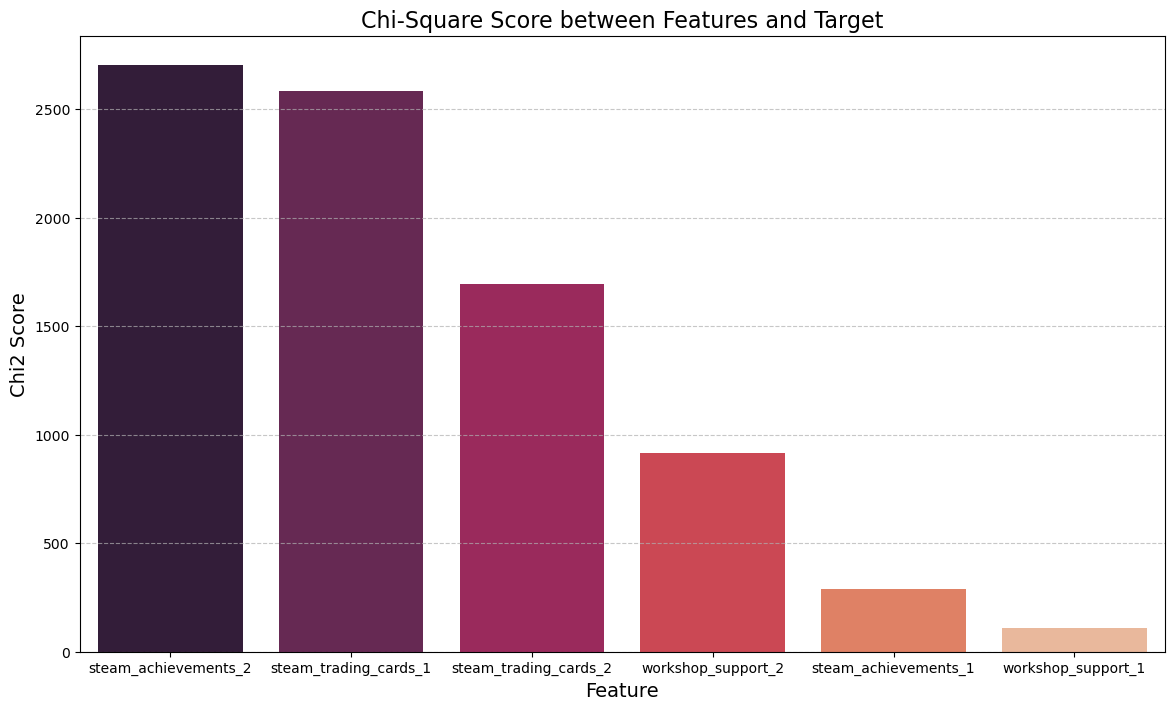

In [59]:
cols = [
    "steam_achievements_1", "steam_achievements_2",
    "steam_trading_cards_1", "steam_trading_cards_2",
    "workshop_support_1", "workshop_support_2"
]

X = x_train[cols]
y = y_train

chi2_scores, p_values = chi2(X, y)

correlation_df = pd.DataFrame({
    'Feature': cols,
    'Chi2 Score': chi2_scores,
    'P-value': p_values
}).sort_values(by='Chi2 Score', ascending=False)

print(correlation_df)

plt.figure(figsize=(14, 8))
sns.barplot(
    data=correlation_df,
    x='Feature',
    y='Chi2 Score',
    palette='rocket'
)
plt.title('Chi-Square Score between Features and Target', fontsize=16)
plt.ylabel('Chi2 Score', fontsize=14)
plt.xlabel('Feature', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


categorical (Anova)

                  Feature    Chi2 Score        p-value  Cramér's V
38       publisherClass_2  19185.359230   0.000000e+00    0.577371
0               age_years  10652.527240   0.000000e+00    0.248391
37       publisherClass_1   9332.356047   0.000000e+00    0.402685
33  steam_trading_cards_1   9232.874868   0.000000e+00    0.400533
6                  Casual   4697.909368   0.000000e+00    0.285708
40       publisherClass_4   4472.392191   0.000000e+00    0.278766
32   steam_achievements_2   4342.278051   0.000000e+00    0.274681
39       publisherClass_3   3555.121582   0.000000e+00    0.248540
13                  Indie   2938.994613   0.000000e+00    0.225980
34  steam_trading_cards_2   2078.261088   0.000000e+00    0.190029
3               Adventure   1201.669220  3.184474e-260    0.144498
10           Free To Play   1078.783892  1.458356e-233    0.136911
36     workshop_support_2    991.236475  1.432849e-214    0.131238
35     workshop_support_1    917.918909  1.148831e-198    0.12

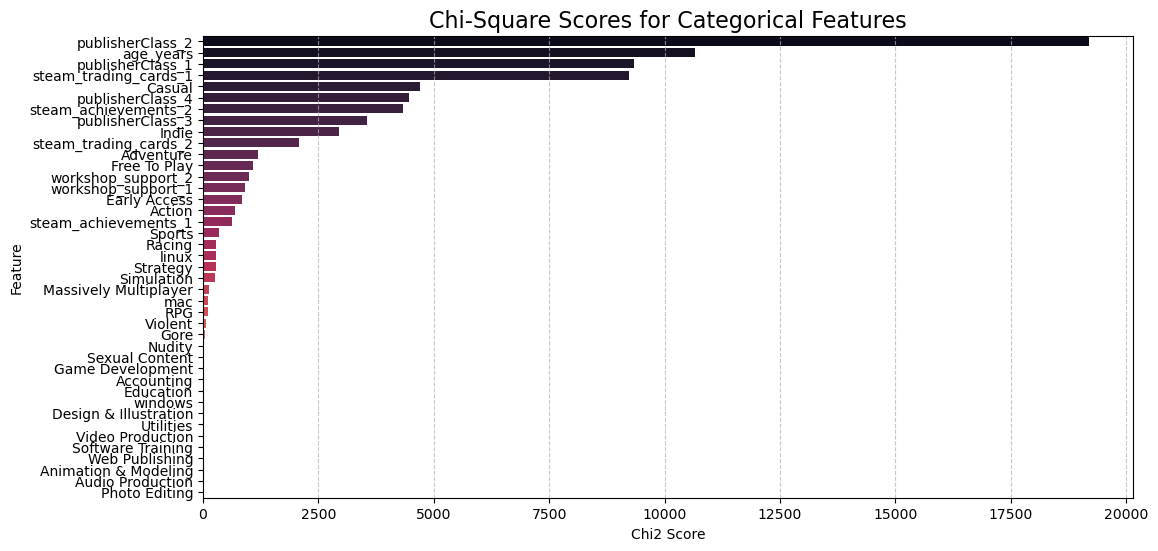

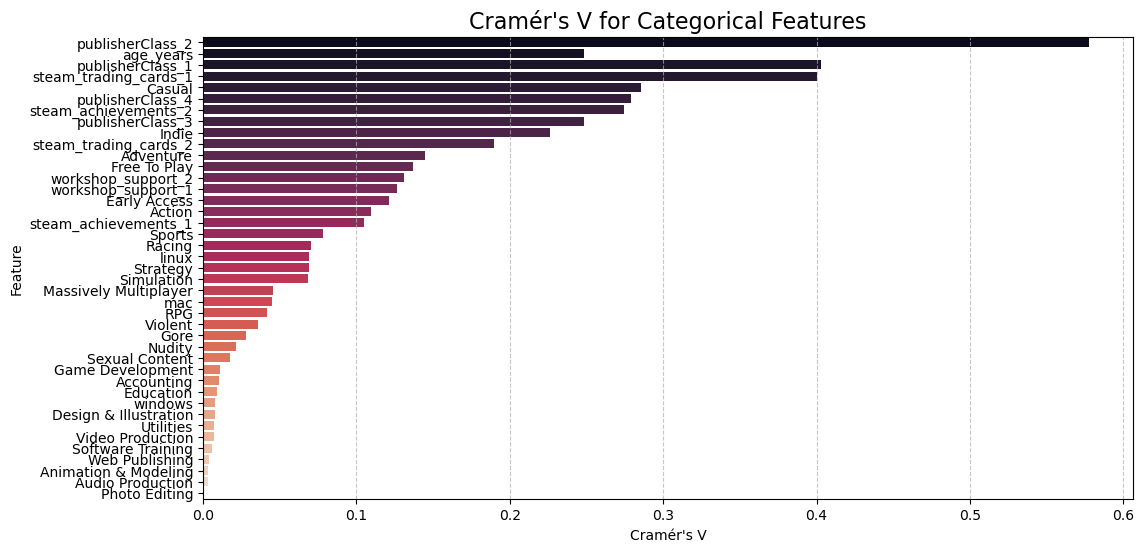

In [60]:
li = [
    "price", "reviewScore", "1-GameRating", "2-GameRatingWithGenres",
    "3-RatingOverPrice", "4-GameRatingWithPlatforms", "5-NameAsCopiesSold",
    "6-GameRatingWithNames"
]
te = x_train.drop(columns=li, axis=1)

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2_val = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2_val / n
    r, k = confusion_matrix.shape
    return np.sqrt(phi2 / min(k - 1, r - 1)) if min(k - 1, r - 1) > 0 else 0

chi2_scores = []
p_vals = []
cramers_v_scores = []

for col in te.columns:
    valid = ~te[col].isna()
    x_valid = te[col][valid]
    y_valid = y_train[valid]

    contingency = pd.crosstab(x_valid, y_valid)
    chi2_stat, p, _, _ = chi2_contingency(contingency)

    cv = cramers_v(x_valid, y_valid)

    chi2_scores.append(chi2_stat)
    p_vals.append(p)
    cramers_v_scores.append(cv)

correlation_df = pd.DataFrame({
    'Feature': te.columns,
    'Chi2 Score': chi2_scores,
    'p-value': p_vals,
    "Cramér's V": cramers_v_scores
}).sort_values(by="Chi2 Score", ascending=False)

print(correlation_df)

plt.figure(figsize=(12, 6))
sns.barplot(data=correlation_df, y='Feature', x='Chi2 Score', palette='rocket')
plt.title('Chi-Square Scores for Categorical Features', fontsize=16)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(data=correlation_df, y='Feature', x="Cramér's V", palette='rocket')
plt.title("Cramér's V for Categorical Features", fontsize=16)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


In [61]:
x_train.shape

(57552, 49)

In [62]:
drop=[]
for idx, row in correlation_df.iterrows():
    if row["Chi2 Score"] < 10 or row["Cramér's V"] < 0.04:
        drop.append(row["Feature"])

x_train.drop(columns=drop,inplace=True)
x_test.drop(columns=drop,inplace=True)

In [63]:
x_train.shape

(57552, 33)

In [64]:
x_train.head()

,price,reviewScore,age_years,1-GameRating,2-GameRatingWithGenres,3-RatingOverPrice,4-GameRatingWithPlatforms,5-NameAsCopiesSold,6-GameRatingWithNames,Action,Adventure,Casual,Early Access,Free To Play,Indie,Massively Multiplayer,RPG,Racing,Simulation,Sports,Strategy,linux,mac,steam_achievements_1,steam_achievements_2,steam_trading_cards_1,steam_trading_cards_2,workshop_support_1,workshop_support_2,publisherClass_1,publisherClass_2,publisherClass_3,publisherClass_4
38327,-0.153846,1.0,8,-0.416163,-0.356408,-0.189011,-0.180219,-0.396092,-0.130439,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0
20411,0.307692,0.0,9,-0.437231,-0.378905,-0.222032,-0.204046,3.894046,-0.131956,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0,1,0,0
35590,-0.076923,0.6,6,-0.424123,-0.357166,-0.195462,-0.184874,-0.041152,-0.117107,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0
43805,-0.460769,0.8,6,-0.424178,-0.365603,-0.124070,-0.133359,-0.292889,-0.111755,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0
15921,-0.076923,0.0,5,-0.437278,-0.378807,-0.221843,-0.203910,-0.318931,-0.132430,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0


numerical correlation

                     Feature      F-Score        p-value
2               1-GameRating  2804.337823   0.000000e+00
3     2-GameRatingWithGenres  2733.871274   0.000000e+00
1                reviewScore  1263.635074   0.000000e+00
4          3-RatingOverPrice   912.449791   0.000000e+00
0                      price   822.942525   0.000000e+00
5  4-GameRatingWithPlatforms   634.328602   0.000000e+00
7      6-GameRatingWithNames   488.219634  2.587861e-313
6         5-NameAsCopiesSold    10.734869   4.758876e-07


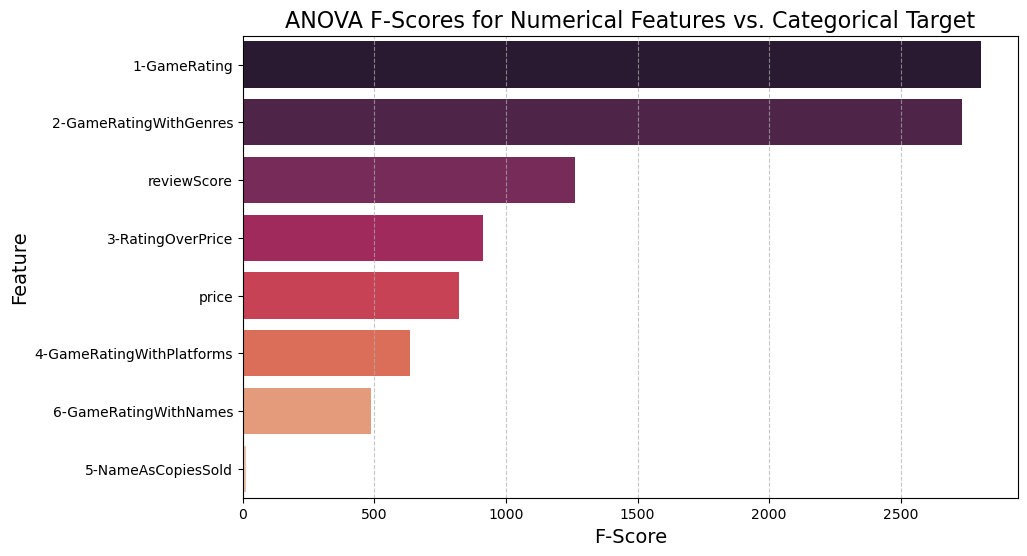

In [65]:
li = [
    "price", "reviewScore", "1-GameRating", "2-GameRatingWithGenres",
    "3-RatingOverPrice", "4-GameRatingWithPlatforms", "5-NameAsCopiesSold",
    "6-GameRatingWithNames"
]

f_scores, p_values = f_classif(x_train[li], y_train)

anova_df = pd.DataFrame({
    'Feature': li,
    'F-Score': f_scores,
    'p-value': p_values
}).sort_values(by='F-Score', ascending=False)

print(anova_df)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=anova_df,
    y='Feature',
    x='F-Score',
    palette='rocket'
)
plt.title('ANOVA F-Scores for Numerical Features vs. Categorical Target', fontsize=16)
plt.xlabel('F-Score', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


In [66]:
li=[]

for idx, row in anova_df.iterrows():
    if row["F-Score"] < 10 :
        li.append(row["Feature"])

x_train.drop(li,inplace=True, axis=1)
x_test.drop(li, inplace=True, axis=1)

In [67]:
x_train.shape

(57552, 33)

In [68]:
x_train.head()

,price,reviewScore,age_years,1-GameRating,2-GameRatingWithGenres,3-RatingOverPrice,4-GameRatingWithPlatforms,5-NameAsCopiesSold,6-GameRatingWithNames,Action,Adventure,Casual,Early Access,Free To Play,Indie,Massively Multiplayer,RPG,Racing,Simulation,Sports,Strategy,linux,mac,steam_achievements_1,steam_achievements_2,steam_trading_cards_1,steam_trading_cards_2,workshop_support_1,workshop_support_2,publisherClass_1,publisherClass_2,publisherClass_3,publisherClass_4
38327,-0.153846,1.0,8,-0.416163,-0.356408,-0.189011,-0.180219,-0.396092,-0.130439,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0
20411,0.307692,0.0,9,-0.437231,-0.378905,-0.222032,-0.204046,3.894046,-0.131956,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0,1,0,0
35590,-0.076923,0.6,6,-0.424123,-0.357166,-0.195462,-0.184874,-0.041152,-0.117107,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0
43805,-0.460769,0.8,6,-0.424178,-0.365603,-0.124070,-0.133359,-0.292889,-0.111755,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0
15921,-0.076923,0.0,5,-0.437278,-0.378807,-0.221843,-0.203910,-0.318931,-0.132430,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0


# Model Training

# Applying PCA

In [69]:
# pca = PCA(n_components=20)  

# x_train = pca.fit_transform(x_train)
# x_test = pca.transform(x_test)

# Measure Training , Test Time 

In [70]:
training_times = {}
test_times = {}

# Logistic Regression With Grid Search

In [71]:
# log_reg = LogisticRegression(random_state=42, max_iter=1000)

# param_grid = {
#     'C': [0.01, 0.1, 1, 10, 100],             
#     'penalty': ['l2'],                         
#     'solver': ['lbfgs', 'liblinear', 'saga']
# }

# grid_search = GridSearchCV(
#     estimator=log_reg,
#     param_grid=param_grid,
#     cv=5,
#     scoring='accuracy',
#     n_jobs=-1,
#     verbose=1
# )

# grid_search.fit(x_train, y_train)
# best_logreg = grid_search.best_estimator_
    
# y_pred = best_logreg.predict(x_test)
# accuracy = accuracy_score(y_test, y_pred)

# print("Best Hyperparameters from GridSearchCV:", grid_search.best_params_)
# print("Accuracy:", accuracy)
# print("\nClassification Report:\n", classification_report(y_test, y_pred))


Fitting 5 folds for each of 15 candidates, totalling 75 fits
Best Hyperparameters from GridSearchCV: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
Accuracy: 0.6169503802969939


# Logistic Regression With Best Parameters

In [72]:
start = time.time()

log_reg = LogisticRegression(random_state=42, C=10, penalty='l2', solver='lbfgs', max_iter=1000)
log_reg.fit(x_train, y_train)

end = time.time()
training_times['Logistic Regression'] = end - start

start = time.time()
y_pred = log_reg.predict(x_test)
end = time.time()
test_times['Logistic Regression'] = end - start

y_pred_train = log_reg.predict(x_train)

acc_Train=accuracy_score(y_train, y_pred_train)
acc_Test = accuracy_score(y_test, y_pred)

print("Train Accuracy:", acc_Train)
print("Test Accuracy:", acc_Test)
print("#############################################################")
print(classification_report(y_test, y_pred))

Train Accuracy: 0.5845670002780095
Test Accuracy: 0.6167330677290837
#############################################################
              precision    recall  f1-score   support

           1       0.83      0.75      0.79      7023
           2       0.42      0.52      0.47      3596
           3       0.42      0.38      0.40      2071
           4       0.50      0.55      0.52      1115

    accuracy                           0.62     13805
   macro avg       0.54      0.55      0.54     13805
weighted avg       0.64      0.62      0.62     13805



# Plots

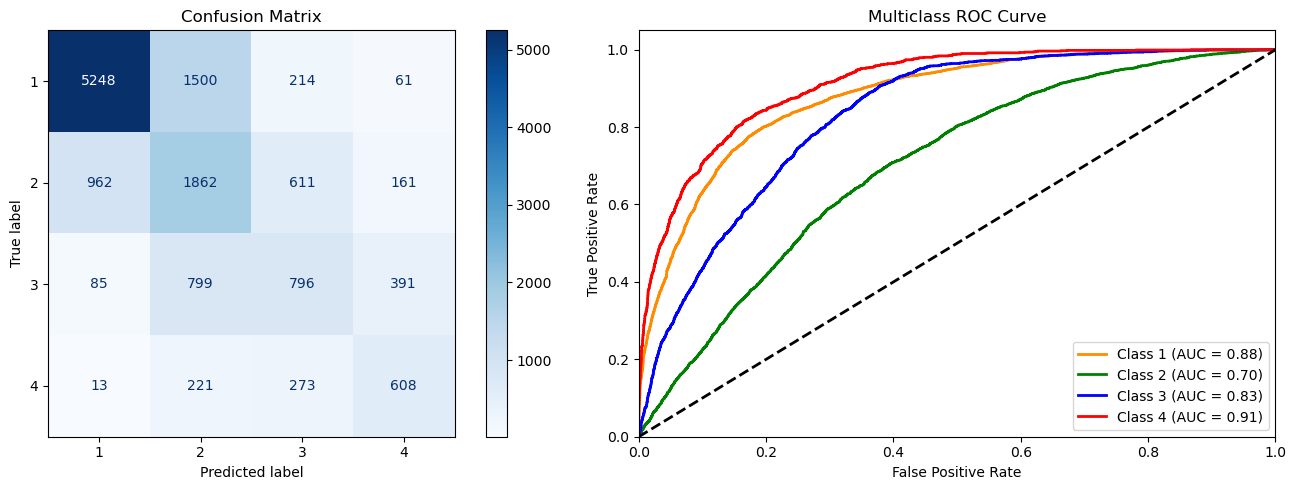

In [73]:
classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)
y_prob = log_reg.predict_proba(x_test)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fig, axs = plt.subplots(1, 2, figsize=(14, 5))

ConfusionMatrixDisplay.from_estimator(log_reg, x_test, y_test, cmap='Blues', ax=axs[0])
axs[0].set_title("Confusion Matrix")

colors = ['darkorange', 'green', 'blue', 'red', 'purple', 'brown']
for i, color in zip(range(len(classes)), colors):
    axs[1].plot(fpr[i], tpr[i], color=color, lw=2,
                label=f'Class {classes[i]} (AUC = {roc_auc[i]:.2f})')

axs[1].plot([0, 1], [0, 1], 'k--', lw=2)
axs[1].set_xlim([0.0, 1.0])
axs[1].set_ylim([0.0, 1.05])
axs[1].set_xlabel('False Positive Rate')
axs[1].set_ylabel('True Positive Rate')
axs[1].set_title('Multiclass ROC Curve')
axs[1].legend(loc="lower right")

plt.tight_layout()
plt.show()


# RandomForest & GridSearch

In [74]:
# rf = RandomForestClassifier(random_state=42)

# param_grid = {
#     'n_estimators': [50, 100, 200],  
#     'max_depth': [None, 10, 20, 30],  
#     'min_samples_split': [2, 5, 10],  
#     'min_samples_leaf': [1, 2, 4],    
#     'max_features': ['auto', 'sqrt', 'log2']  
# }

# grid_search = GridSearchCV(
#     estimator=rf,
#     param_grid=param_grid,
#     cv=5,
#     scoring='accuracy',
#     n_jobs=-1,  
#     verbose=1
# )

# grid_search.fit(x_train, y_train)
# best_rf = grid_search.best_estimator_

# y_pred = best_rf.predict(x_test)
# accuracy = accuracy_score(y_test, y_pred)

# print("Best Hyperparameters from GridSearchCV:", grid_search.best_params_)
# print("Accuracy:", accuracy)
# print("\nClassification Report:\n", classification_report(y_test, y_pred))

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best Hyperparameters from GridSearchCV: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Accuracy: 0.7285041651575516

----------------------------------------------------------------------------------------------------------------------

# RandomForest w/ best parameters from GridSearch

In [75]:
start = time.time()

rf1 = RandomForestClassifier(
    max_depth=20,
    max_features='sqrt',
    min_samples_leaf=3,
    min_samples_split=15,
    n_estimators=600,
    random_state=42
)

rf1.fit(x_train, y_train)

end = time.time()
training_times['RandomForest'] = end - start

start = time.time()
y_pred = rf1.predict(x_test)
end = time.time()
test_times['RandomForest'] = end - start

y_pred_train=rf1.predict(x_train)

acc_Train=accuracy_score(y_train,y_pred_train)
acc_Test=accuracy_score(y_test,y_pred)

print("Train Accuracy:", acc_Train)
print("Test Accuracy:", acc_Test)
print("#############################################################")
print(classification_report(y_test, y_pred))

Train Accuracy: 0.8426814011676397
Test Accuracy: 0.7119884099963781
#############################################################
              precision    recall  f1-score   support

           1       0.92      0.81      0.86      7023
           2       0.55      0.63      0.59      3596
           3       0.51      0.56      0.53      2071
           4       0.61      0.61      0.61      1115

    accuracy                           0.71     13805
   macro avg       0.65      0.65      0.65     13805
weighted avg       0.73      0.71      0.72     13805



# Plots

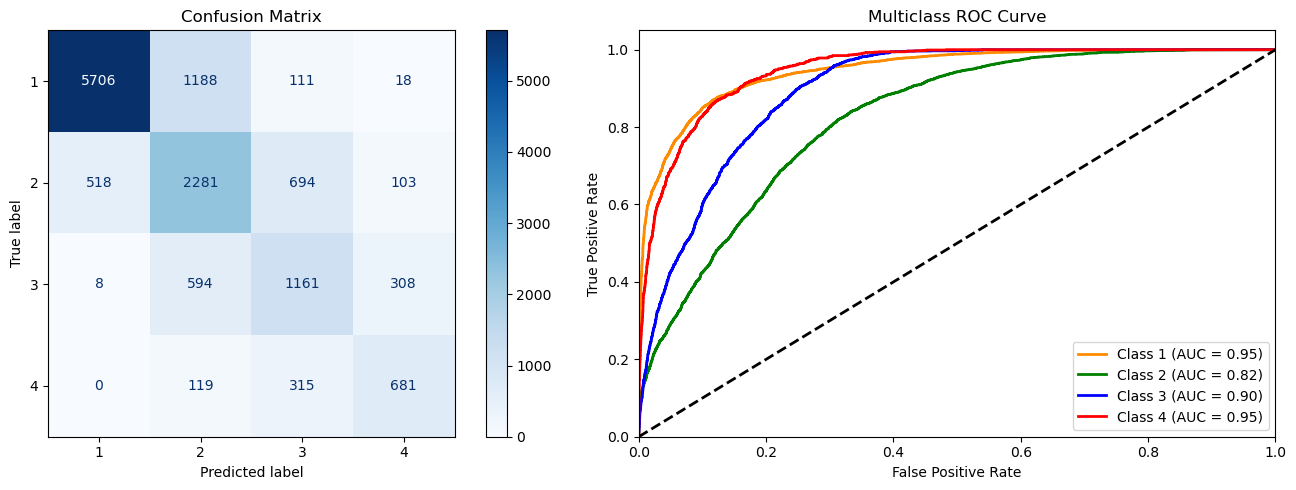

In [76]:
classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)
y_prob = rf1.predict_proba(x_test)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fig, axs = plt.subplots(1, 2, figsize=(14, 5))

ConfusionMatrixDisplay.from_estimator(rf1, x_test, y_test, cmap='Blues', ax=axs[0])
axs[0].set_title("Confusion Matrix")

colors = ['darkorange', 'green', 'blue', 'red', 'purple', 'brown']
for i, color in zip(range(len(classes)), colors):
    axs[1].plot(fpr[i], tpr[i], color=color, lw=2,
                label=f'Class {classes[i]} (AUC = {roc_auc[i]:.2f})')

axs[1].plot([0, 1], [0, 1], 'k--', lw=2)
axs[1].set_xlim([0.0, 1.0])
axs[1].set_ylim([0.0, 1.05])
axs[1].set_xlabel('False Positive Rate')
axs[1].set_ylabel('True Positive Rate')
axs[1].set_title('Multiclass ROC Curve')
axs[1].legend(loc="lower right")

plt.tight_layout()
plt.show()

# SVM With Grid Search

In [77]:
# svm = SVC()

# param_grid = {
#     'C': [0.1, 1, 10],
#     'kernel': ['linear', 'rbf', 'poly'],
#     'gamma': ['scale', 'auto']
# }

# grid_search = GridSearchCV(
#     estimator=svm,
#     param_grid=param_grid,
#     cv=5,
#     scoring='accuracy',
#     n_jobs=-1,
#     verbose=1
# )

# grid_search.fit(x_train, y_train)

# best_svm = grid_search.best_estimator_
# y_pred_train = best_svm.predict(x_train)
# y_pred_test = best_svm.predict(x_test)

# acc_Train = accuracy_score(y_train, y_pred_train)
# acc_Test = accuracy_score(y_test, y_pred_test)

# print("Best Parameters:", grid_search.best_params_)
# print("Train Accuracy:", acc_Train)
# print("Test Accuracy:", acc_Test)
# print("#############################################################")
# print(classification_report(y_test, y_pred_test))

# SVM With Best Parameters

In [78]:
start = time.time()

svm = SVC(C = 5, kernel="rbf", gamma="scale", probability=True)
svm.fit(x_train, y_train)

end = time.time()
training_times['SVM'] = end - start

y_pred_train = svm.predict(x_train)

start = time.time()
y_pred_test = svm.predict(x_test)
end = time.time()
test_times['SVM'] = end - start

acc_Train = accuracy_score(y_train, y_pred_train)
acc_Test = accuracy_score(y_test, y_pred_test)

print("Train Accuracy:", acc_Train)
print("Test Accuracy:", acc_Test)
print("#############################################################")
print(classification_report(y_test, y_pred_test))

Train Accuracy: 0.5928725326661106
Test Accuracy: 0.6379572618616444
#############################################################
              precision    recall  f1-score   support

           1       0.82      0.79      0.80      7023
           2       0.44      0.51      0.47      3596
           3       0.46      0.41      0.44      2071
           4       0.59      0.52      0.55      1115

    accuracy                           0.64     13805
   macro avg       0.58      0.56      0.57     13805
weighted avg       0.65      0.64      0.64     13805



for rbf: c = 1
Train Accuracy: 0.6080334667415201
Test Accuracy: 0.6149945671858023

# Plots

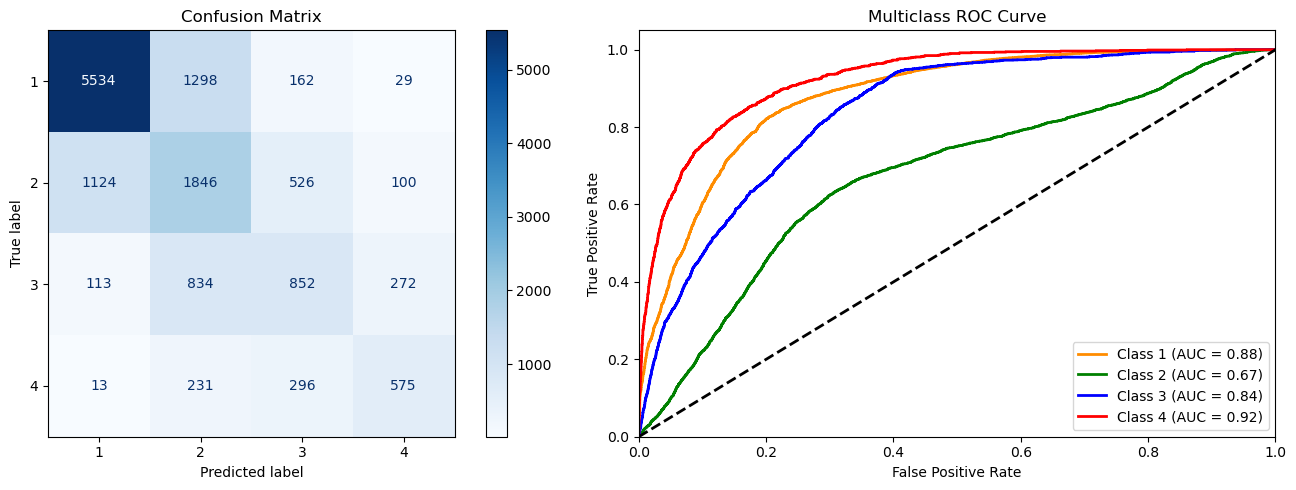

In [79]:
classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)
y_prob = svm.predict_proba(x_test)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fig, axs = plt.subplots(1, 2, figsize=(14, 5))

ConfusionMatrixDisplay.from_estimator(svm, x_test, y_test, cmap='Blues', ax=axs[0])
axs[0].set_title("Confusion Matrix")

colors = ['darkorange', 'green', 'blue', 'red', 'purple', 'brown']
for i, color in zip(range(len(classes)), colors):
    axs[1].plot(fpr[i], tpr[i], color=color, lw=2,
                label=f'Class {classes[i]} (AUC = {roc_auc[i]:.2f})')

axs[1].plot([0, 1], [0, 1], 'k--', lw=2)
axs[1].set_xlim([0.0, 1.0])
axs[1].set_ylim([0.0, 1.05])
axs[1].set_xlabel('False Positive Rate')
axs[1].set_ylabel('True Positive Rate')
axs[1].set_title('Multiclass ROC Curve')
axs[1].legend(loc="lower right")

plt.tight_layout()
plt.show()


# XGBOOST & GridSearch

In [80]:
# xgb = XGBClassifier(
#     use_label_encoder=False,
#     eval_metric='logloss',
#     random_state=42,
#     n_jobs=-1
# )

# param_grid = {
#     'n_estimators': [200, 400, 600],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'max_depth': [3, 5 , 9],
#     # 'subsample': [0.6, 0.8, 1.0],
#     # 'colsample_bytree': [0.6, 0.8, 1.0]
# }

# grid_search = GridSearchCV(
#     estimator=xgb,
#     param_grid=param_grid,
#     cv=5,
#     scoring='accuracy',
#     n_jobs=-1,
#     verbose=1
# )
# y_trainXG = y_train - 1
# y_testXG = y_test - 1

# grid_search.fit(x_train, y_trainXG)

# best_model = grid_search.best_estimator_
# y_pred = best_model.predict(x_test)

# accuracy = accuracy_score(y_testXG, y_pred)

# print("Best Hyperparameters:", grid_search.best_params_)
# print("Accuracy:", accuracy)
# print("Classification Report:\n", classification_report(y_testXG, y_pred))


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 400}
Accuracy: 0.7382832307135097

# XGBOOST w/ Best Parameters from Grid Search

In [81]:
start = time.time()

model1 = XGBClassifier(
    n_estimators=470,
    learning_rate=0.11,
    max_depth=5,
    subsample=0.9,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)

y_trainXG = y_train - 1
y_testXG = y_test - 1

model1.fit(x_train, y_trainXG)

end = time.time()
training_times['Xgboost'] = end - start

start = time.time()
y_pred = model1.predict(x_test)
end = time.time()
test_times['Xgboost'] = end - start

y_pred_train=model1.predict(x_train)

acc_Train=accuracy_score(y_trainXG, y_pred_train)
acc_Test=accuracy_score(y_testXG, y_pred)

print("Accuracy on Train Data:", acc_Train)
print("Accuracy on Test Data:", acc_Test)
print("Classification Report:\n", classification_report(y_testXG, y_pred))

Accuracy on Train Data: 0.8125521267723103
Accuracy on Test Data: 0.7314741035856573
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.83      0.88      7023
           1       0.57      0.69      0.62      3596
           2       0.53      0.55      0.54      2071
           3       0.63      0.61      0.62      1115

    accuracy                           0.73     13805
   macro avg       0.66      0.67      0.66     13805
weighted avg       0.75      0.73      0.74     13805



# Plots

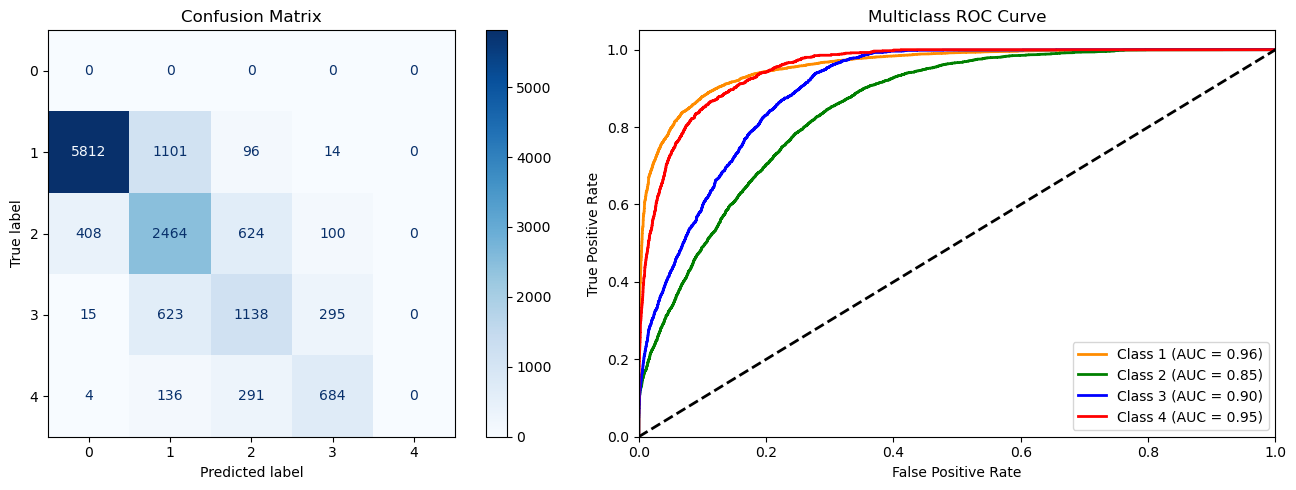

In [82]:
classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)
y_prob = model1.predict_proba(x_test)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fig, axs = plt.subplots(1, 2, figsize=(14, 5))

ConfusionMatrixDisplay.from_estimator(model1, x_test, y_test, cmap='Blues', ax=axs[0])
axs[0].set_title("Confusion Matrix")

colors = ['darkorange', 'green', 'blue', 'red', 'purple', 'brown']
for i, color in zip(range(len(classes)), colors):
    axs[1].plot(fpr[i], tpr[i], color=color, lw=2,
                label=f'Class {classes[i]} (AUC = {roc_auc[i]:.2f})')

axs[1].plot([0, 1], [0, 1], 'k--', lw=2)
axs[1].set_xlim([0.0, 1.0])
axs[1].set_ylim([0.0, 1.05])
axs[1].set_xlabel('False Positive Rate')
axs[1].set_ylabel('True Positive Rate')
axs[1].set_title('Multiclass ROC Curve')
axs[1].legend(loc="lower right")

plt.tight_layout()
plt.show()


# LGB &  Grid Search

In [83]:
# model = LGBMClassifier(random_state=42)

# param_grid = {
#     'n_estimators': [100, 200],
#     'learning_rate': [0.05, 0.1],
#     'num_leaves': [31, 50],
#     'max_depth': [-1, 10]
# }

# grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
# grid_search.fit(x_train, y_train)

# best_model = grid_search.best_estimator_
# y_pred = best_model.predict(x_test)

# accuracy = accuracy_score(y_test, y_pred)

# print("Best LightGBM Params:", grid_search.best_params_)
# print(f"Accuracy: {accuracy:.4f}")
# print(classification_report(y_test, y_pred))

Best LightGBM Params: {'learning_rate': 0.05, 'max_depth': 10, 'n_estimators': 200, 'num_leaves': 50}
Accuracy: 0.7396

# LGB w/ Best Parameters from Grid Search

In [84]:
start = time.time()

modelLgb = LGBMClassifier(learning_rate=0.06,max_depth=15,n_estimators=200,num_leaves=50,random_state=42)
modelLgb.fit(x_train, y_train)

end = time.time()
training_times['LGBModel'] = end - start

start = time.time()
y_pred = modelLgb.predict(x_test)
end = time.time()
test_times['LGBModel'] = end - start

y_pred_train=modelLgb.predict(x_train)

acc_Train=accuracy_score(y_train,y_pred_train)
acc_Test=accuracy_score(y_test,y_pred)

print("Train Accuracy:", acc_Train)
print("Test Accuracy:", acc_Test)
print("#############################################################")
print(classification_report(y_test, y_pred))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005773 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1957
[LightGBM] [Info] Number of data points in the train set: 57552, number of used features: 33
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
Train Accuracy: 0.8030998053933833
Test Accuracy: 0.7279971024990946
#############################################################
              precision    recall  f1-score   support

           1       0.93      0.82      0.87      7023
           2       0.57      0.68      0.62      3596
           3       0.53      0.54      0.53      2071
           4       0.62      0.63      0.62      1115

    accuracy

# Plots

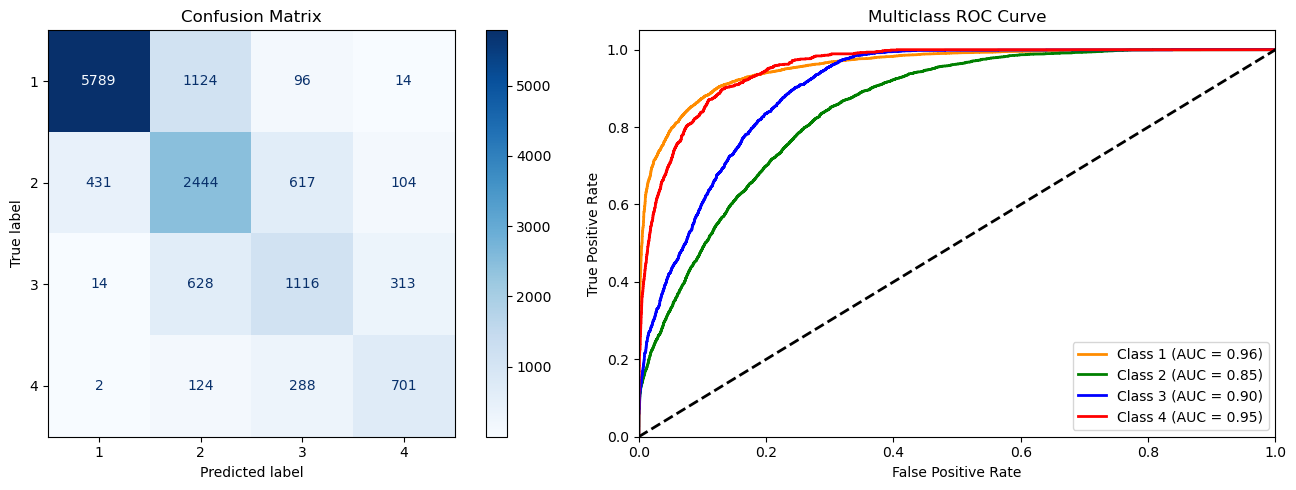

In [85]:
classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)
y_prob = modelLgb.predict_proba(x_test)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fig, axs = plt.subplots(1, 2, figsize=(14, 5))

ConfusionMatrixDisplay.from_estimator(modelLgb, x_test, y_test, cmap='Blues', ax=axs[0])
axs[0].set_title("Confusion Matrix")

colors = ['darkorange', 'green', 'blue', 'red', 'purple', 'brown']
for i, color in zip(range(len(classes)), colors):
    axs[1].plot(fpr[i], tpr[i], color=color, lw=2,
                label=f'Class {classes[i]} (AUC = {roc_auc[i]:.2f})')

axs[1].plot([0, 1], [0, 1], 'k--', lw=2)
axs[1].set_xlim([0.0, 1.0])
axs[1].set_ylim([0.0, 1.05])
axs[1].set_xlabel('False Positive Rate')
axs[1].set_ylabel('True Positive Rate')
axs[1].set_title('Multiclass ROC Curve')
axs[1].legend(loc="lower right")

plt.tight_layout()
plt.show()


# CatBoost & Grid Search

In [86]:
# model = CatBoostClassifier(verbose=0, random_state=42)

# param_grid = {
#     'iterations': [200, 300],
#     'learning_rate': [0.03, 0.1],
#     'depth': [6, 10]
# }

# grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
# grid_search.fit(x_train, y_train)

# best_model = grid_search.best_estimator_
# y_pred = best_model.predict(x_test)

# accuracy = accuracy_score(y_test, y_pred)

# print("Best CatBoost Params:", grid_search.best_params_)
# print(f"Accuracy: {accuracy:.4f}")
# print(classification_report(y_test, y_pred))

Best CatBoost Params: {'depth': 10, 'iterations': 300, 'learning_rate': 0.1}
Accuracy: 0.7333

# CatBoost w/ Best Parameters from Grid Search

In [87]:
start = time.time()

model1C = CatBoostClassifier(
    iterations=350,
    learning_rate=0.1,
    depth=10,
    verbose=0,
    random_state=42
)

model1C.fit(x_train, y_train)

end = time.time()
training_times['CatBoost'] = end - start

start = time.time()
y_pred = model1C.predict(x_test)
end = time.time()
test_times['CatBoost'] = end - start

y_pred_train= model1C.predict(x_train)

acc_Train = accuracy_score(y_train, y_pred_train)
acc_Test = accuracy_score(y_test, y_pred)

print(f"Train Accuracy: {acc_Train:.4f}")
print(f"Test Accuracy: {acc_Test:.4f}")

print(classification_report(y_test, y_pred))

Train Accuracy: 0.8397
Test Accuracy: 0.7245
              precision    recall  f1-score   support

           1       0.92      0.82      0.87      7023
           2       0.56      0.67      0.61      3596
           3       0.53      0.56      0.54      2071
           4       0.62      0.62      0.62      1115

    accuracy                           0.72     13805
   macro avg       0.66      0.67      0.66     13805
weighted avg       0.75      0.72      0.73     13805



# plots

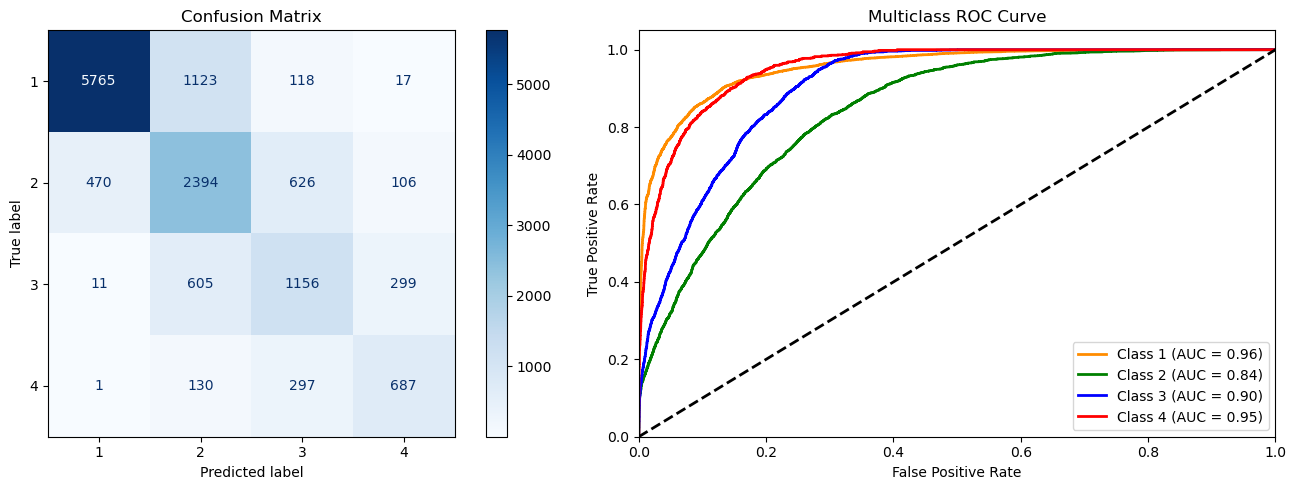

In [88]:
classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)
y_prob = model1C.predict_proba(x_test)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fig, axs = plt.subplots(1, 2, figsize=(14, 5))

ConfusionMatrixDisplay.from_estimator(model1C, x_test, y_test, cmap='Blues', ax=axs[0])
axs[0].set_title("Confusion Matrix")

colors = ['darkorange', 'green', 'blue', 'red', 'purple', 'brown']
for i, color in zip(range(len(classes)), colors):
    axs[1].plot(fpr[i], tpr[i], color=color, lw=2,
                label=f'Class {classes[i]} (AUC = {roc_auc[i]:.2f})')

axs[1].plot([0, 1], [0, 1], 'k--', lw=2)
axs[1].set_xlim([0.0, 1.0])
axs[1].set_ylim([0.0, 1.05])
axs[1].set_xlabel('False Positive Rate')
axs[1].set_ylabel('True Positive Rate')
axs[1].set_title('Multiclass ROC Curve')
axs[1].legend(loc="lower right")

plt.tight_layout()
plt.show()


# Plot train time for all models

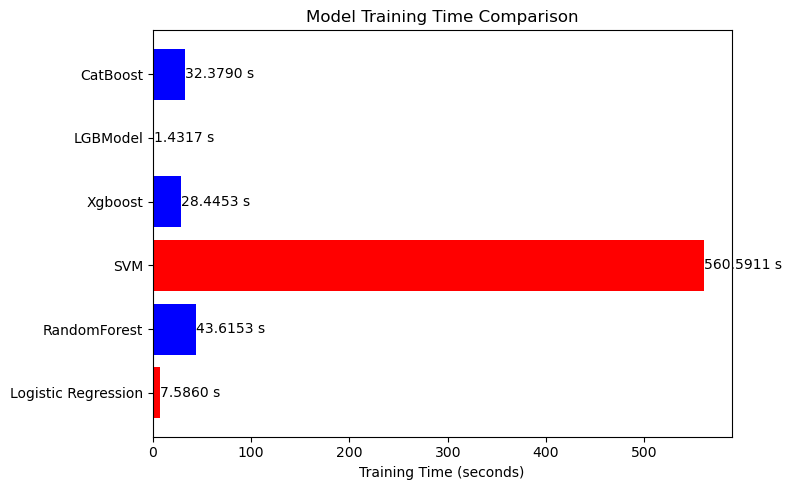

In [89]:
model_names = list(training_times.keys())
times = list(training_times.values())

plt.figure(figsize=(8, 5))
bars = plt.barh(model_names, times, color=['red', 'blue'])
plt.xlabel('Training Time (seconds)')
plt.title('Model Training Time Comparison')

for bar in bars:
    plt.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2,
             f'{bar.get_width():.4f} s', va='center')

plt.tight_layout()
plt.show()

# Plot test time for all models

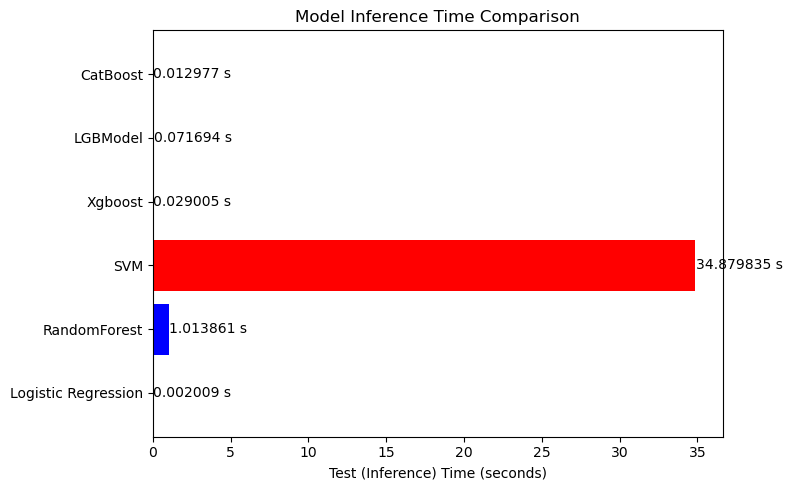

In [90]:
model_names = list(test_times.keys())
times = list(test_times.values())

plt.figure(figsize=(8, 5))
bars = plt.barh(model_names, times, color=['red', 'blue'])
plt.xlabel('Test (Inference) Time (seconds)')
plt.title('Model Inference Time Comparison')

for bar in bars:
    plt.text(bar.get_width() + 0.001, bar.get_y() + bar.get_height()/2,
             f'{bar.get_width():.6f} s', va='center')

plt.tight_layout()
plt.show()

# Bar Chart for Train Accuracy for all models

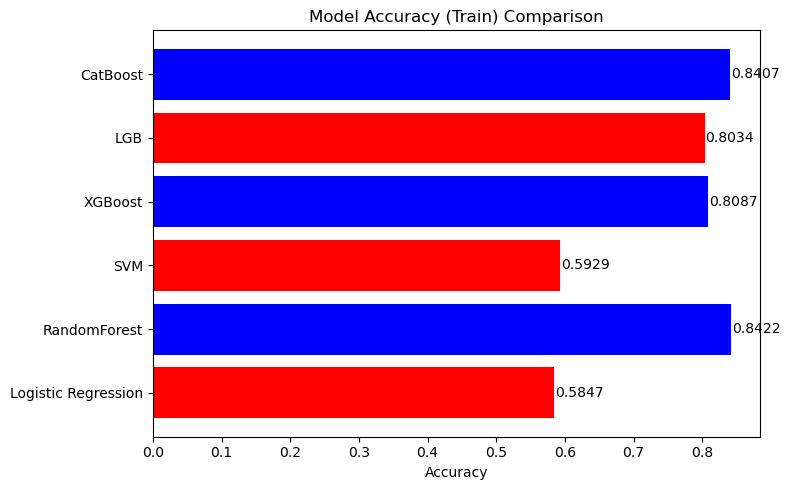

In [91]:
train_accuracies = {
    "Logistic Regression":0.5847,
    "RandomForest":0.8422,
    "SVM":0.5929,
    "XGBoost":0.8087,
    "LGB":0.8034,
    "CatBoost":0.8407
}

model_names = list(train_accuracies.keys())
accuracies = list(train_accuracies.values())

plt.figure(figsize=(8, 5))
bars = plt.barh(model_names, accuracies, color=['red', 'blue'])
plt.xlabel('Accuracy')
plt.title('Model Accuracy (Train) Comparison')

for bar in bars:
    plt.text(bar.get_width() + 0.001, bar.get_y() + bar.get_height()/2,
             f'{bar.get_width():.4f}', va='center')

plt.tight_layout()
plt.show()


# Bar Chart for Test Accuracy for all models

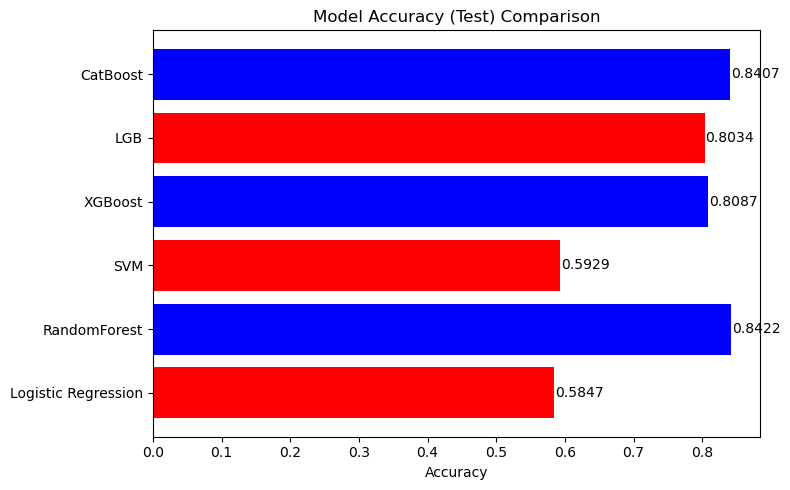

In [92]:
test_accuracies = {
    "Logistic Regression":0.6169,
    "RandomForest":0.7108,
    "SVM":0.6379,
    "XGBoost":0.7297,
    "LGB":0.7299,
    "CatBoost":0.7194
}

model_names = list(train_accuracies.keys())
accuracies = list(train_accuracies.values())

plt.figure(figsize=(8, 5))
bars = plt.barh(model_names, accuracies, color=['red', 'blue'])
plt.xlabel('Accuracy')
plt.title('Model Accuracy (Test) Comparison')

for bar in bars:
    plt.text(bar.get_width() + 0.001, bar.get_y() + bar.get_height()/2,
             f'{bar.get_width():.4f}', va='center')

plt.tight_layout()
plt.show()

# Combine All the data to train best model

In [93]:
modelLgb1 = LGBMClassifier(learning_rate=0.06,max_depth=15,n_estimators=200,num_leaves=50,random_state=42)

x_last= pd.concat([x_train, x_test], axis=0)
y_last = pd.concat([y_train, y_test], axis=0)

modelLgb1.fit(x_last,y_last)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003361 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1957
[LightGBM] [Info] Number of data points in the train set: 71357, number of used features: 33
[LightGBM] [Info] Start training from score -1.203791
[LightGBM] [Info] Start training from score -1.378213
[LightGBM] [Info] Start training from score -1.466823
[LightGBM] [Info] Start training from score -1.526662


LGBMClassifier(learning_rate=0.06, max_depth=15, n_estimators=200,
               num_leaves=50, random_state=42)

# After Comparison of Models in terms of (accuracy_score, classification report) lightGBM is the best model to use in deployment with target

In [94]:
# joblib.dump(modelLgb1, 'lgb_model.pkl')
# joblib.dump(Ro_scaler, 'robust_scaler.pkl')
# joblib.dump(minmax_scaler, 'minmax_scaler.pkl')

# joblib.dump(OneHot_Encoder, 'onehot_encoder.pkl')
# joblib.dump(mlb_genres, 'mlb_genres_encoder.pkl')

# joblib.dump(dict1, 'dict1_genres.pkl')
# joblib.dump(dict2, 'dict2_platforms.pkl')
# joblib.dump(dict12, 'dict12_names.pkl')
# joblib.dump(mlb_sup, 'mlb_platforms_encoder.pkl')
# joblib.dump(Null_Dict,"Null_Dict.pkl")
